In [159]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

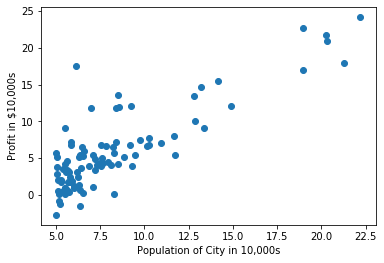

4.483388256587725


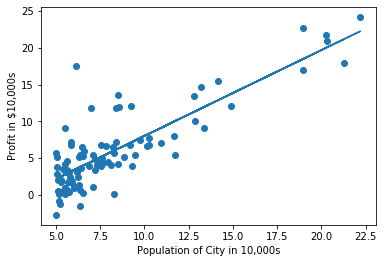

[[-3.63029144]
 [ 1.16636235]]


In [160]:
data = pd.read_csv("exdata1.txt", header = None, names=["Population", "Profit"])

#use linear regression to see how the populattion of a city affects the profit of a business

#print(data)

#get columns of data
population = data.iloc[:,0]
profit = data.iloc[:,1]

#number of training examples
m = len(population)
plt.scatter(population,profit)

#create plot
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

#make the arrays into column vectors
population = population[:,np.newaxis]
profit = profit[:,np.newaxis]

#maake a vector with 2 zeroes for the coeffecients
#there are two coeffecients even though there is only one feature
#theta for the constant will always be one
thetas = np.zeros([2,1])

iterations = 1500
#learning rate 
alpha = 0.01

#column vector with size of number of training examples
ones = np.ones((m,1))

#combines the two column vectors to create a an array of m rows and 2 columns
population = np.hstack((ones,population))

#print(population)


#cost function given by formula:
# J(theta1, theta2) = (1/2m) * sum from 1 to m of (h(x)-y)^2
def cost(population, profit, thetas):
    #np.power squares all terms in the vector
    square_error = np.power((np.dot(population, thetas) - profit),2)
    #print(square_error)
    #np.sum sums the vector
    return (1/(2*m) * np.sum(square_error))

#cost when both thetas are zero
J = cost(population, profit, thetas)

#thetaj = thetaj - alpha * partial theta j of j(theta1, theta2) (cost function)
def gradient_descent(population, profit, thetas, alpha, iterations):
    for i in range(iterations):
        residual = np.dot(population, thetas) - profit
        #.T transposes the population matrix
        temp = np.dot(population.T, residual)
        #temp contains sum of all residuals, and the product of the sum of the ith residual and the ith population value
        thetas = thetas - (alpha/m) * temp
    return thetas


#print(np.sum(-1*data.iloc[:,1]))
optimal_thetas = gradient_descent(population, profit, thetas, alpha, iterations)

J_min = cost(population, profit, optimal_thetas)
print(J_min)

plt.scatter(population[:,1], profit)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(population[:,1], np.dot(population, optimal_thetas))
plt.show()

print(optimal_thetas)



![title](gradientDescent.jpg)